In [2]:
from mlforecast import MLForecast

In [3]:
from mlforecast.auto import AutoMLForecast, AutoLightGBM, AutoXGBoost, AutoRidge

In [4]:
from statsforecast.utils import AirPassengersDF
df = AirPassengersDF
df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [ ]:
auto_mlf = AutoMLForecast(
    freq='ME',  # frequency of your time series (e.g., 'D' for daily, 'W' for weekly)
    season_length=12,  # length of seasonality in your data
    models={
        'lgb': AutoLightGBM(),
        'xgb': AutoXGBoost(),
        'ridge': AutoRidge()
    },
    num_threads=4  # number of threads to use for parallel processing
)

In [ ]:
auto_mlf.fit(n_windows=3, df=df, h = 5, num_samples=20)


[I 2024-08-25 20:40:25,506] A new study created in memory with name: no-name-0eb4b82a-b06e-4509-94a0-adab4cff464d
[I 2024-08-25 20:40:25,783] Trial 0 finished with value: 0.056893984287298915 and parameters: {'n_estimators': 169, 'lambda_l1': 0.027334069690310565, 'lambda_l2': 0.0026599310838681858, 'num_leaves': 112, 'feature_fraction': 0.7118273996694524, 'bagging_fraction': 0.8229470565333281, 'objective': 'l2', 'target_transforms_idx': 0, 'lags_idx': 2, 'lag_transforms_idx': 2, 'use_date_features': 0}. Best is trial 0 with value: 0.056893984287298915.
[I 2024-08-25 20:40:25,876] Trial 1 finished with value: 0.07053752230301659 and parameters: {'n_estimators': 422, 'lambda_l1': 1.1600316346542318e-07, 'lambda_l2': 0.005744988873954126, 'num_leaves': 5, 'feature_fraction': 0.972334458524792, 'bagging_fraction': 0.7609241608750359, 'objective': 'l1', 'target_transforms_idx': 0, 'lags_idx': 0, 'lag_transforms_idx': 1, 'use_date_features': 1}. Best is trial 0 with value: 0.0568939842872

AutoMLForecast(models={'lgb': AutoModel(model=LGBMRegressor), 'xgb': AutoModel(model=XGBRegressor), 'ridge': AutoModel(model=Ridge)})

In [ ]:
auto_mlf.predict(h = 5)

,unique_id,ds,lgb,xgb,ridge
0,1.0,1961-01-31,443.309653,444.287494,456.847798
1,1.0,1961-02-28,413.654213,416.056641,428.689291
2,1.0,1961-03-31,442.493393,445.316753,459.456727
3,1.0,1961-04-30,483.866891,489.050229,503.317255
4,1.0,1961-05-31,494.846210,499.993219,526.709148


In [ ]:
auto_mlf.models_

{'lgb': MLForecast(models=[lgb], freq=ME, lag_features=['exponentially_weighted_mean_lag1_alpha0.9', 'rolling_mean_lag12_window_size12_min_samples1'], date_features=['month', 'year'], num_threads=4),
 'xgb': MLForecast(models=[xgb], freq=ME, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'exponentially_weighted_mean_lag1_alpha0.9'], date_features=[], num_threads=4),
 'ridge': MLForecast(models=[ridge], freq=ME, lag_features=['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12', 'exponentially_weighted_mean_lag1_alpha0.9', 'rolling_mean_lag12_window_size12_min_samples1', 'rolling_mean_lag5_window_size12_min_samples1'], date_features=['month', 'year'], num_threads=4)}

In [5]:
from utilsforecast.plotting import plot_series

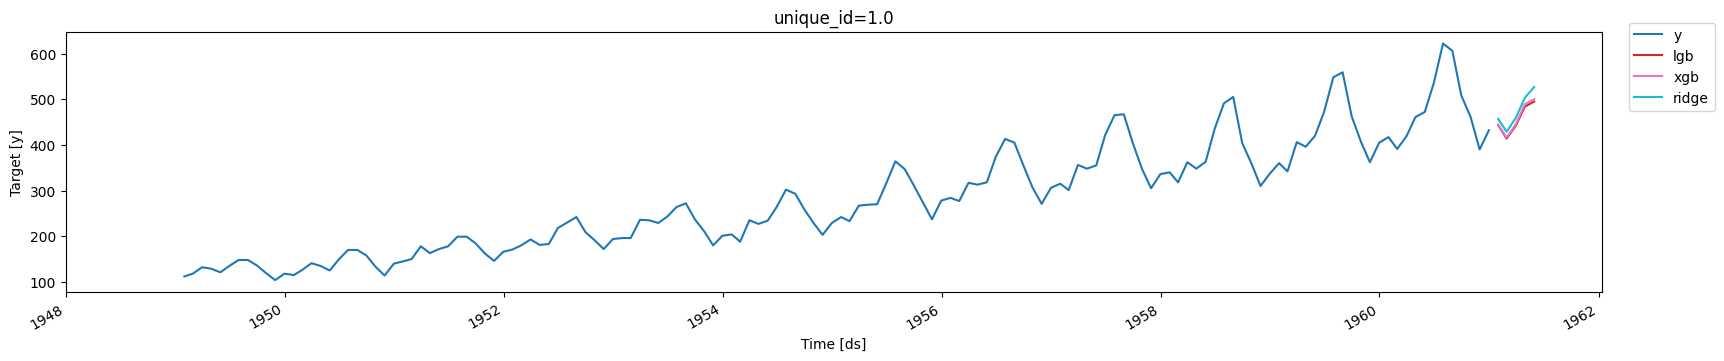

In [ ]:
plot_series(df, auto_mlf.predict(h = 5))

In [6]:
from mlforecast.auto import AutoModel, AutoMLForecast
import optuna

In [7]:
from sklearn.linear_model import (
    LinearRegression, 
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
    QuantileRegressor,
    Lasso, 
    LassoCV,
    Ridge, 
    RidgeCV,
    ElasticNet, 
    ElasticNetCV,

)

In [8]:
def lasso_space(trial):
    return {
        'alpha': trial.suggest_float('alpha', 1e-5, 1, log = True),
        'max_iter': trial.suggest_int('max_iter', 100, 1000)
    }

def ridge_space(trial):
    return {
        'alpha': trial.suggest_float('alpha', 1e-5, 100, log = True),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 10000),
        'tol': trial.suggest_float('tol', 1e-6, 1e-2,log = True),
        # 'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']),
        'positive': trial.suggest_categorical('positive', [True, False])
    }

In [18]:
from mlforecast.auto import (
    AutoLightGBM,
    AutoXGBoost,
    AutoCatboost,
    AutoRidge,
    AutoLasso,
    AutoElasticNet,
    AutoLinearRegression,
    AutoRandomForest
)

# Scikit-learn models
from sklearn.linear_model import (
    LinearRegression, 
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor,
    QuantileRegressor,
    Lasso, 
    LassoCV,
    Ridge, 
    ElasticNet, 
    ElasticNetCV,

)
from sklearn.neighbors import (
    KNeighborsRegressor,
    )

from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    GradientBoostingRegressor,
    ExtraTreesRegressor,
    HistGradientBoostingRegressor,
    AdaBoostRegressor,
    BaggingRegressor)
from sklearn.svm import SVR, LinearSVR

In [123]:
import optuna
from mlforecast.auto import AutoModel, AutoLightGBM, AutoXGBoost, AutoRidge, AutoLasso, AutoElasticNet, AutoLinearRegression, AutoRandomForest

def lasso_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'selection': trial.suggest_categorical('selection', ['cyclic', 'random'])
    }

def lassocv_space(trial):
    return {
        'eps': trial.suggest_loguniform('eps', 1e-5, 1e-2),
        'n_alphas': trial.suggest_int('n_alphas', 50, 200),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'cv': trial.suggest_int('cv', 3, 10)
    }

def ridge_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'solver': trial.suggest_categorical('solver', ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'])
    }

def linear_regression_space(trial):
    return {
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'positive': trial.suggest_categorical('positive', [True, False])
    }

def theil_sen_space(trial):
    return {
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'max_subpopulation': trial.suggest_int('max_subpopulation', 5000, 20000)
    }

def ransac_space(trial):
    return {
        'max_trials': trial.suggest_int('max_trials', 50, 500),
        'min_samples': trial.suggest_uniform('min_samples', 0.1, 1.0),
        'max_skips': trial.suggest_int('max_skips', int(1e4), int(1e6), log=True),
        'stop_probability': trial.suggest_uniform('stop_probability', 0.90, 0.99)
    }

def huber_space(trial):
    return {
        'epsilon': trial.suggest_uniform('epsilon', 1.1, 2.0),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2)
    }

def quantile_space(trial):
    return {
        'quantile': trial.suggest_uniform('quantile', 0.1, 0.9),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        # 'solver': trial.suggest_categorical('solver', ['highs', 'highs-ds', 'highs-ipm', 'interior-point', 'revised simplex'])
    }

def knn_space(trial):
    return {
        'n_neighbors': trial.suggest_int('n_neighbors', 1, 20),
        'weights': trial.suggest_categorical('weights', ['uniform', 'distance']),
        'algorithm': trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
        'leaf_size': trial.suggest_int('leaf_size', 10, 50),
        'p': trial.suggest_int('p', 1, 2)
    }

def mlp_space(trial):
    return {
        'hidden_layer_sizes': trial.suggest_categorical('hidden_layer_sizes', [(50,), (100,), (50, 50), (100, 50)]),
        'activation': trial.suggest_categorical('activation', ['tanh', 'relu']),
        'solver': trial.suggest_categorical('solver', ['sgd', 'adam']),
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 1e-2),
        'learning_rate': trial.suggest_categorical('learning_rate', ['constant', 'adaptive']),
        'max_iter': trial.suggest_int('max_iter', 100, 500)
    }

def rf_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        # 'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

def gbm_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0)
    }

def extra_trees_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        # 'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }

def hist_gbm_space(trial):
    return {
        'max_iter': trial.suggest_int('max_iter', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 2, 32, log=True),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_bins': trial.suggest_int('max_bins', 32, 256),
        'l2_regularization': trial.suggest_loguniform('l2_regularization', 1e-10, 1.0)
    }

def adaboost_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 1.0),
        'loss': trial.suggest_categorical('loss', ['linear', 'square', 'exponential'])
    }

def bagging_space(trial):
    return {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_samples': trial.suggest_uniform('max_samples', 0.5, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.5, 1.0),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'bootstrap_features': trial.suggest_categorical('bootstrap_features', [True, False])
    }

def svr_space(trial):
    return {
        'kernel': trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
        'C': trial.suggest_loguniform('C', 1e-2, 1e2),
        'epsilon': trial.suggest_loguniform('epsilon', 1e-3, 1.0),
        'gamma': trial.suggest_categorical('gamma', ['scale', 'auto'])
    }

def linear_svr_space(trial):
    return {
        'epsilon': trial.suggest_loguniform('epsilon', 1e-3, 1.0),
        'C': trial.suggest_loguniform('C', 1e-2, 1e2),
        'loss': trial.suggest_categorical('loss', ['epsilon_insensitive', 'squared_epsilon_insensitive']),
        'intercept_scaling': trial.suggest_loguniform('intercept_scaling', 1e-1, 1e1)
    }

def elastic_net_space(trial):
    return {
        'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
        'l1_ratio': trial.suggest_uniform('l1_ratio', 0, 1),
        'fit_intercept': trial.suggest_categorical('fit_intercept', [True, False]),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'selection': trial.suggest_categorical('selection', ['cyclic', 'random'])
    }

def elastic_net_cv_space(trial):
    return {
        'l1_ratio': trial.suggest_uniform('l1_ratio', 0, 1),
        'eps': trial.suggest_loguniform('eps', 1e-5, 1e-2),
        'n_alphas': trial.suggest_int('n_alphas', 50, 200),
        'max_iter': trial.suggest_int('max_iter', 100, 3000),
        'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
        'cv': trial.suggest_int('cv', 3, 10)
    }

# Now, let's create the auto_models dictionary
auto_models = {
    'lasso': AutoModel(Lasso(random_state=0), lasso_space),
    'lasso_cv': AutoModel(LassoCV(random_state=0), lassocv_space),
    'ridge': AutoModel(Ridge(), ridge_space),
    'linear': AutoModel(LinearRegression(), linear_regression_space),
    'theil_sen': AutoModel(TheilSenRegressor(random_state=0), theil_sen_space),
    'ransac': AutoModel(RANSACRegressor(random_state=0), ransac_space),
    'huber': AutoModel(HuberRegressor(), huber_space),
    'quantile': AutoModel(QuantileRegressor(), quantile_space),
    'knn': AutoModel(KNeighborsRegressor(), knn_space),
    'mlp': AutoModel(MLPRegressor(random_state=0), mlp_space),
    'rf': AutoModel(RandomForestRegressor(random_state=0), rf_space),
    'gbm': AutoModel(GradientBoostingRegressor(random_state=0), gbm_space),
    'extra_trees': AutoModel(ExtraTreesRegressor(random_state=0), extra_trees_space),
    'hist_gbm': AutoModel(HistGradientBoostingRegressor(random_state=0), hist_gbm_space),
    'adaboost': AutoModel(AdaBoostRegressor(random_state=0), adaboost_space),
    'bagging': AutoModel(BaggingRegressor(random_state=0), bagging_space),
    'svr': AutoModel(SVR(), svr_space),
    'linear_svr': AutoModel(LinearSVR(random_state=0), linear_svr_space),
    'elastic': AutoModel(ElasticNet(random_state=0), elastic_net_space),
    'elastic_cv': AutoModel(ElasticNetCV(random_state=0), elastic_net_cv_space),
    'xgb': AutoXGBoost(),
    'lgb': AutoLightGBM(),
    'ridge2': AutoRidge(),
    'lasso2': AutoLasso(),
    'elastic_net2': AutoElasticNet(),
    'linear2': AutoLinearRegression(),
    'rf2': AutoRandomForest()
}

In [125]:
auto_models

{'lasso': AutoModel(model=Lasso),
 'lasso_cv': AutoModel(model=LassoCV),
 'ridge': AutoModel(model=Ridge),
 'linear': AutoModel(model=LinearRegression),
 'theil_sen': AutoModel(model=TheilSenRegressor),
 'ransac': AutoModel(model=RANSACRegressor),
 'huber': AutoModel(model=HuberRegressor),
 'quantile': AutoModel(model=QuantileRegressor),
 'knn': AutoModel(model=KNeighborsRegressor),
 'mlp': AutoModel(model=MLPRegressor),
 'rf': AutoModel(model=RandomForestRegressor),
 'gbm': AutoModel(model=GradientBoostingRegressor),
 'extra_trees': AutoModel(model=ExtraTreesRegressor),
 'hist_gbm': AutoModel(model=HistGradientBoostingRegressor),
 'adaboost': AutoModel(model=AdaBoostRegressor),
 'bagging': AutoModel(model=BaggingRegressor),
 'svr': AutoModel(model=SVR),
 'linear_svr': AutoModel(model=LinearSVR),
 'elastic': AutoModel(model=ElasticNet),
 'elastic_cv': AutoModel(model=ElasticNetCV),
 'xgb': AutoModel(model=XGBRegressor),
 'lgb': AutoModel(model=LGBMRegressor),
 'ridge2': AutoModel(model

In [12]:
from utilsforecast.losses import mae

In [13]:
def custom_loss(df, train_df=None):  # train_df is not used but included for compatibility
    result = mae(df, models=['model'])
    return result['model'].mean()

In [115]:
def my_fit_config(trial: optuna.Trial):
    if trial.suggest_int('use_id', 0, 1):
        static_features = ['unique_id']
    else:
        static_features = None
    return {
        'static_features': static_features
    }

In [119]:
auto_mlf = AutoMLForecast(
    freq='ME',  # frequency of your time series (e.g., 'D' for daily, 'W' for weekly)
    season_length=12,  # length of seasonality in your data
    models=auto_models,
    num_threads=4 , # number of threads to use for parallel processing
    fit_config=my_fit_config,
)

In [124]:
auto_mlf.fit(n_windows=3, df=df, h = 12, num_samples=3, loss=custom_loss)

[I 2024-08-26 00:29:23,116] A new study created in memory with name: no-name-55feed2e-02c1-426b-8150-27a524476884
C:\Users\wesst\AppData\Local\Temp\ipykernel_25492\2737439524.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'alpha': trial.suggest_loguniform('alpha', 1e-5, 10),
C:\Users\wesst\AppData\Local\Temp\ipykernel_25492\2737439524.py:9: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'tol': trial.suggest_loguniform('tol', 1e-5, 1e-2),
[I 2024-08-26 00:29:23,347] Trial 0 finished with value: 21.06264982600155 and parameters: {'alpha': 0.019628224813442792, 'fit_intercept': True, 'max_iter': 1680, 'tol': 0.00018662266976517952, 'selection': 'cyclic', 'target_transf

InvalidParameterError: The 'max_features' parameter of RandomForestRegressor must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

In [ ]:
auto_mlf.fit_config


<function mlforecast.auto.AutoMLForecast.__init__.<locals>.<lambda>(trial)>

In [56]:
auto_mlf.results_['ridge'].best_params

{'alpha': 8.088061612153108,
 'fit_intercept': False,
 'max_iter': 8711,
 'tol': 3.2427919007365154e-06,
 'positive': True,
 'target_transforms_idx': 1,
 'lags_idx': 1,
 'lag_transforms_idx': 0,
 'use_date_features': 1}

In [57]:
for model_name, study in auto_mlf.results_.items():
    best_trial = study.best_trial
    best_config = best_trial.user_attrs['config']
    
    print(f"Best configuration for {model_name}:")
    print(f"  Target transforms: {best_config['mlf_init_params'].get('target_transforms')}")
    print(f"  Lags: {best_config['mlf_init_params'].get('lags')}")
    print(f"  Lag transforms: {best_config['mlf_init_params'].get('lag_transforms')}")
    print(f"  Date features: {best_config['mlf_init_params'].get('date_features')}")
    print(f"  Model params: {best_config['model_params']}")
    print(f"  MLForecast fit params: {best_config['mlf_fit_params']}")
    print(f"  Best value: {best_trial.value}")
    print()

Best configuration for ridge:
  Target transforms: [<mlforecast.target_transforms.LocalStandardScaler object at 0x000002809C232900>]
  Lags: [12]
  Lag transforms: None
  Date features: ['month', 'year']
  Model params: {'alpha': 8.088061612153108, 'fit_intercept': False, 'max_iter': 8711, 'tol': 3.2427919007365154e-06, 'positive': True}
  MLForecast fit params: {}
  Best value: 17.906785598884

Best configuration for lasso:
  Target transforms: [<mlforecast.target_transforms.Differences object at 0x000002809C2ECA10>, <mlforecast.target_transforms.LocalStandardScaler object at 0x000002809C2ED100>]
  Lags: range(1, 13)
  Lag transforms: {1: [ExponentiallyWeightedMean(alpha=0.9)]}
  Date features: None
  Model params: {'alpha': 1.0517741365684144e-05, 'max_iter': 618}
  MLForecast fit params: {}
  Best value: 17.933044872193218

Best configuration for lgb:
  Target transforms: [<mlforecast.target_transforms.Differences object at 0x0000028083FD5DF0>, <mlforecast.target_transforms.LocalSta

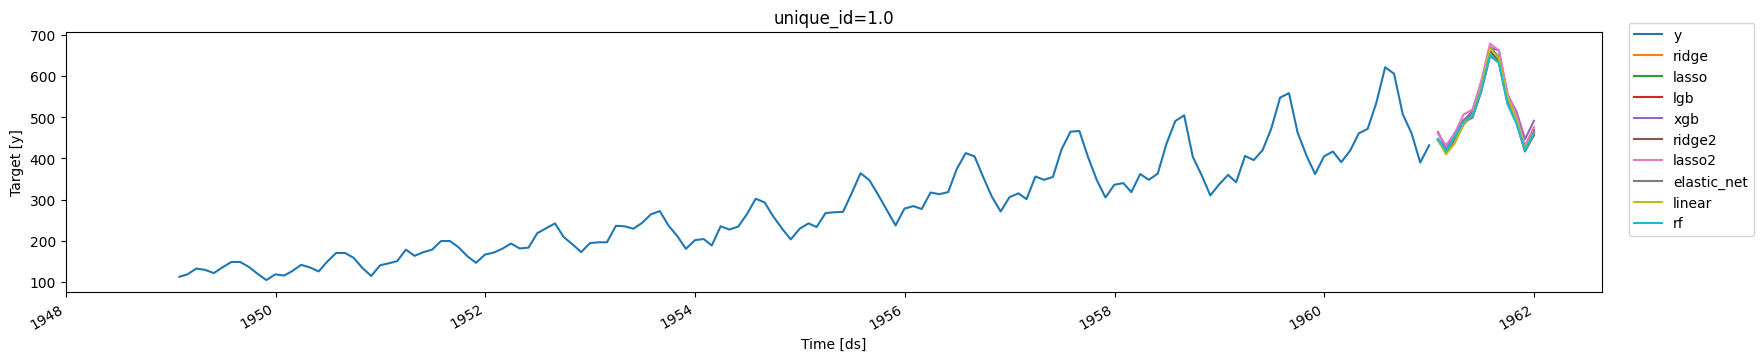

In [22]:
plot_series(df, auto_mlf.predict(h = 12))

In [59]:
df

,unique_id,ds,y
0,1.0,1949-01-31,112.0
1,1.0,1949-02-28,118.0
2,1.0,1949-03-31,132.0
3,1.0,1949-04-30,129.0
4,1.0,1949-05-31,121.0
...,...,...,...
139,1.0,1960-08-31,606.0
140,1.0,1960-09-30,508.0
141,1.0,1960-10-31,461.0
142,1.0,1960-11-30,390.0


In [112]:
from functools import partial
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression, HuberRegressor, RANSACRegressor, TheilSenRegressor, QuantileRegressor
from utilsforecast.feature_engineering import pipeline, trend, fourier, time_features
from utilsforecast.plotting import plot_series

from statsforecast import StatsForecast
from statsforecast.models import SklearnModel
from statsforecast.utils import ConformalIntervals

In [91]:
train_features, valid_features = pipeline(
    df,
    features=[
        trend,        
        partial(fourier, season_length=12, k=12),  # 10 fourier terms
    ],
    freq="ME",
    h=12,
)
train_features.head()

,unique_id,ds,y,trend,sin1_12,sin2_12,sin3_12,sin4_12,sin5_12,sin6_12,...,cos3_12,cos4_12,cos5_12,cos6_12,cos7_12,cos8_12,cos9_12,cos10_12,cos11_12,cos12_12
0,1.0,1949-01-31,112.0,1.0,0.500000,8.660254e-01,1.000000e+00,8.660254e-01,0.500000,-8.742278e-08,...,-4.371139e-08,-0.5,-8.660254e-01,-1.0,-8.660254e-01,-0.5,1.192488e-08,0.5,8.660253e-01,1.0
1,1.0,1949-02-28,118.0,2.0,0.866025,8.660254e-01,-8.742278e-08,-8.660254e-01,-0.866025,1.748456e-07,...,-1.000000e+00,-0.5,4.999999e-01,1.0,5.000000e-01,-0.5,-1.000000e+00,-0.5,4.999996e-01,1.0
2,1.0,1949-03-31,132.0,3.0,1.000000,-8.742278e-08,-1.000000e+00,1.748456e-07,1.000000,-2.384976e-08,...,1.192488e-08,1.0,1.390709e-07,-1.0,-2.900667e-07,1.0,-3.577464e-08,-1.0,-5.920583e-07,1.0
3,1.0,1949-04-30,129.0,4.0,0.866025,-8.660254e-01,1.748456e-07,8.660253e-01,-0.866025,3.496911e-07,...,1.000000e+00,-0.5,-5.000002e-01,1.0,-5.000000e-01,-0.5,1.000000e+00,-0.5,-5.000007e-01,1.0
4,1.0,1949-05-31,121.0,5.0,0.500000,-8.660254e-01,1.000000e+00,-8.660253e-01,0.500000,-6.755325e-07,...,-3.377662e-07,-0.5,8.660253e-01,-1.0,8.660250e-01,-0.5,5.962440e-08,0.5,-8.660259e-01,1.0


In [114]:
import os
os.environ['NIXTLA_ID_AS_COL'] = '1'
sf = StatsForecast(
    models=[
        SklearnModel(Lasso(), alias="lasso_local"),
        SklearnModel(Ridge(), alias="ridge_local"),
        SklearnModel(ElasticNet(), alias="elastic_local"),
        SklearnModel(LinearRegression(), alias="linear_local"),
        SklearnModel(HuberRegressor(), alias="huber_local"),
        SklearnModel(RANSACRegressor(), alias="ransac_local"),
        # SklearnModel(TheilSenRegressor(), alias="theil_sen_local"),
        SklearnModel(QuantileRegressor(), alias="quantile_local"),
        
    ],
    freq="ME",
)
preds = sf.forecast(
    df=train_features,
    h=12,
    X_df=valid_features,
    prediction_intervals=ConformalIntervals(n_windows=4, h=12),
    level=[95],
)

In [98]:
preds

,unique_id,ds,lasso_local,lasso_local-lo-95,lasso_local-hi-95,ridge_local,ridge_local-lo-95,ridge_local-hi-95,elastic_local,elastic_local-lo-95,...,huber_local-hi-95,ransac_local,ransac_local-lo-95,ransac_local-hi-95,theil_sen_local,theil_sen_local-lo-95,theil_sen_local-hi-95,quantile_local,quantile_local-lo-95,quantile_local-hi-95
0,1.0,1961-01-31,452.847168,433.866699,471.827637,449.418243,433.277466,465.558990,458.649048,435.164459,...,454.536072,414.624603,3.887959e+02,4.404533e+02,121119.898438,-1.394357e+05,381675.468750,441.941162,432.921204,450.961151
1,1.0,1961-02-28,448.091644,410.727020,485.456268,442.733521,411.188263,474.278778,455.069580,413.668915,...,457.481812,480.121216,4.471362e+02,5.131063e+02,-117499.000000,-2.962238e+05,61225.765625,444.270599,419.173157,469.368011
2,1.0,1961-03-31,472.334351,450.898193,493.770538,477.675751,456.143280,499.208191,476.167755,455.258698,...,488.962280,447.943756,4.142180e+02,4.816695e+02,292641.187500,-5.787969e+03,591070.375000,446.600006,406.879974,486.320007
3,1.0,1961-04-30,474.938934,448.966095,500.911743,474.632172,448.416687,500.847656,476.742065,451.671265,...,498.516541,441.234772,4.203816e+02,4.620880e+02,-46643.753906,-1.653287e+05,72041.210938,448.929413,404.855072,493.003754
4,1.0,1961-05-31,485.071350,459.236908,510.905792,479.367889,448.000397,510.735382,482.519775,454.304657,...,509.399994,492.184387,-1.161786e+06,1.162770e+06,-348335.312500,-6.068224e+05,-89848.156250,451.258820,397.249115,505.268524
5,1.0,1961-06-30,519.440308,460.006927,578.873657,518.945007,458.357849,579.532104,508.338043,439.730316,...,580.635620,578.656738,5.278594e+02,6.294541e+02,-169084.421875,-5.419865e+05,203817.656250,453.588226,339.961273,567.215210
6,1.0,1961-07-31,553.643311,443.688416,663.598206,558.355530,453.137085,663.573975,533.649475,406.290161,...,665.241943,556.113708,4.068696e+02,7.053578e+02,-699351.125000,-1.268817e+06,-129885.609375,455.917633,260.219086,651.616211
7,1.0,1961-08-31,552.011047,453.076630,650.945496,558.126099,465.204468,651.047668,533.978088,418.999023,...,650.707458,504.062988,3.912400e+02,6.168860e+02,156919.984375,-3.848288e+05,698668.750000,458.247070,276.054047,640.440063
8,1.0,1961-09-30,508.584198,462.229279,554.939148,509.813660,464.891144,554.736145,504.319061,454.732788,...,553.929688,510.836884,4.340321e+02,5.876416e+02,309950.125000,6.268507e+04,557215.187500,460.576477,378.264008,542.888916
9,1.0,1961-10-31,472.746735,446.257782,499.235687,474.245453,448.998749,499.492157,480.905884,461.218353,...,498.430084,429.089813,4.046047e+02,4.535750e+02,411438.625000,8.953085e+04,733346.375000,462.905884,431.398987,494.412781


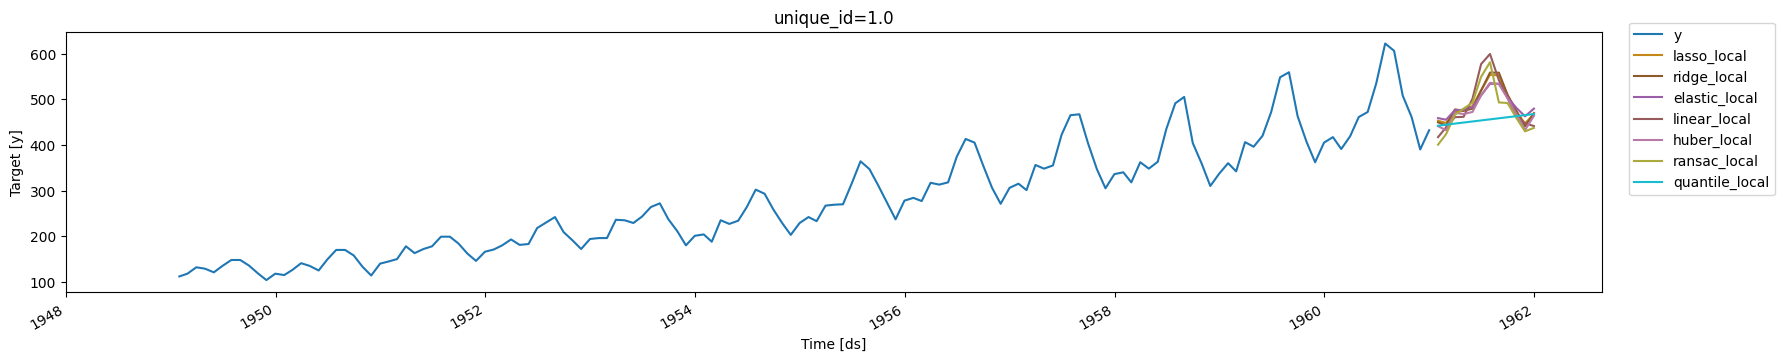

In [101]:
plot_series(df, preds)

In [103]:
auto_df =auto_mlf.predict(h = 12)

In [109]:
import pandas as pd
all = pd.merge(auto_df, preds, on=['unique_id','ds'])

In [110]:
all

,unique_id,ds,ridge,lasso,lgb,xgb,ridge2,lasso2,elastic_net,linear,...,linear_local-hi-95,huber_local,huber_local-lo-95,huber_local-hi-95,ransac_local,ransac_local-lo-95,ransac_local-hi-95,quantile_local,quantile_local-lo-95,quantile_local-hi-95
0,1.0,1961-01-31,445.905332,445.675314,444.451487,435.321798,446.486051,459.916139,444.026655,445.918028,...,462.299225,440.982697,427.429291,454.536072,400.444458,3.349759e+02,4.659130e+02,441.941162,432.921204,450.961151
1,1.0,1961-02-28,420.433630,412.508481,417.994065,411.224416,411.283116,432.040965,418.002619,409.787869,...,455.017609,432.162598,406.843353,457.481812,423.410950,4.003682e+02,4.464537e+02,444.270599,419.173157,469.368011
2,1.0,1961-03-31,448.659603,440.754823,446.711225,468.554742,438.717008,462.060384,445.981085,437.650593,...,482.857666,470.147675,451.333069,488.962280,466.034821,4.375897e+02,4.944799e+02,446.600006,406.879974,486.320007
3,1.0,1961-04-30,490.807196,486.740757,488.217240,483.657490,483.538258,507.089512,487.959428,484.733170,...,479.988495,467.634949,436.753357,498.516541,479.455200,4.562010e+02,5.027094e+02,448.929413,404.855072,493.003754
4,1.0,1961-05-31,502.128345,508.817408,499.246573,533.461915,504.399995,518.882855,498.937776,505.099810,...,544.190491,472.087555,434.775116,509.399994,492.412598,4.470445e+02,5.377807e+02,451.258820,397.249115,505.268524
5,1.0,1961-06-30,565.158367,575.803941,561.789152,568.867968,570.225563,586.426548,561.916125,571.907048,...,633.485718,508.518219,436.400818,580.635620,549.090271,4.726736e+02,6.255069e+02,453.588226,339.961273,567.215210
6,1.0,1961-07-31,652.054021,671.445971,648.295167,595.719994,664.500400,679.701171,648.894473,668.337921,...,723.668518,535.843750,406.445557,665.241943,581.013428,4.358991e+02,7.261278e+02,455.917633,260.219086,651.616211
7,1.0,1961-08-31,636.526333,646.315481,632.471861,596.108342,639.749180,662.547218,632.872822,643.661725,...,632.293030,533.118164,415.528839,650.707458,492.908173,3.593437e+02,6.264727e+02,458.247070,276.054047,640.440063
8,1.0,1961-09-30,539.457733,549.597234,534.872082,571.087567,548.635520,557.479251,534.851170,550.389134,...,560.774353,501.924042,449.918457,553.929688,491.781250,4.433878e+02,5.401747e+02,460.576477,378.264008,542.888916
9,1.0,1961-10-31,493.103602,492.276976,487.870339,481.633907,494.069549,507.089512,487.829519,495.332812,...,490.033936,467.150513,435.870972,498.430084,458.737854,4.213378e+02,4.961379e+02,462.905884,431.398987,494.412781


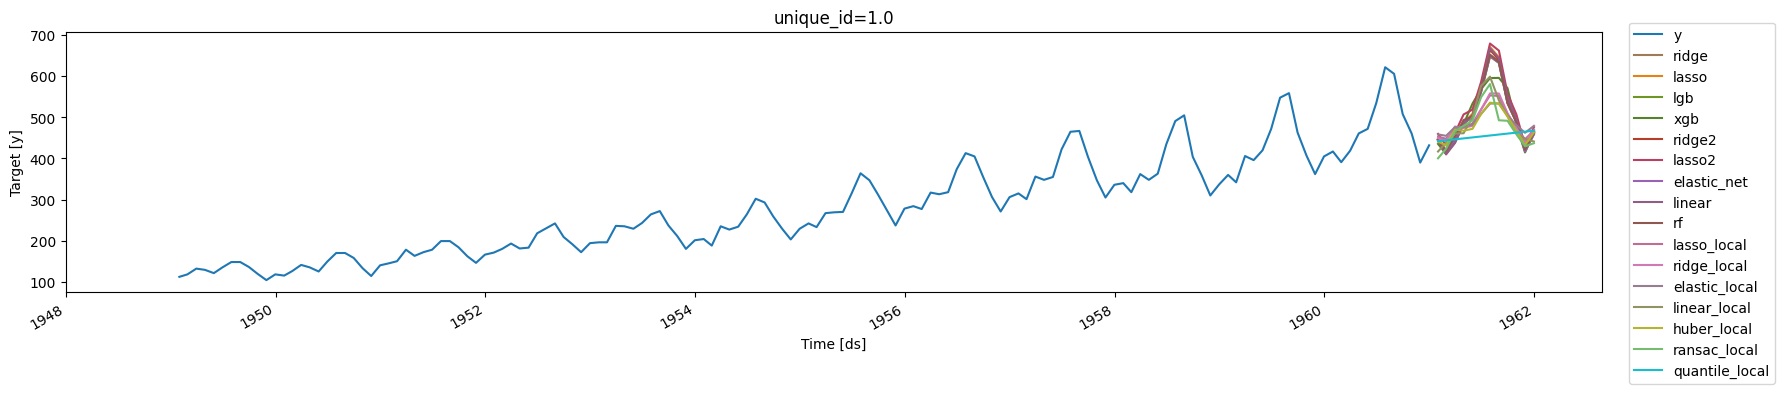

In [111]:
plot_series(df, all)

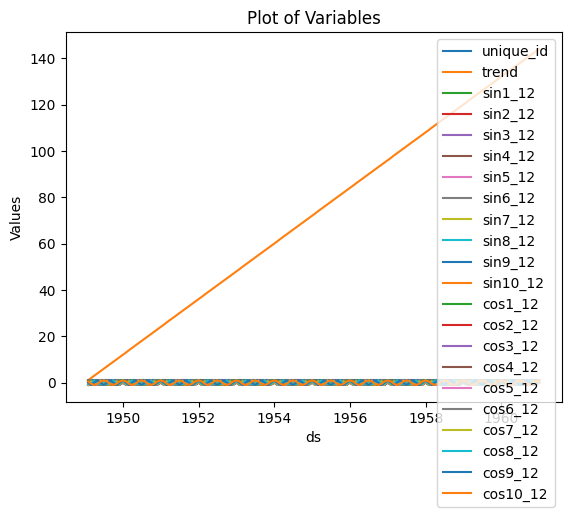

In [74]:
import matplotlib.pyplot as plt

# Set the x-axis as 'ds'
x = train_features['ds']

# Set the y-axis as all other variables
y_variables = [var for var in train_features.columns if var != 'ds' and var != 'y']

# Plot each variable
for var in y_variables:
    plt.plot(x, train_features[var], label=var)

# Set the x-axis label
plt.xlabel('ds')

# Set the y-axis label
plt.ylabel('Values')

# Set the title of the plot
plt.title('Plot of Variables')


# Add a legend
plt.legend()

# Show the plot
plt.show()